# Exercise 8

Different loss function in regression case. 

Simple MLP (multilayer perceptron) neural network and the dataset is generated using Sklearn's _make_regression_-function. Define loss function, print the value of loss function and plot the results. 


In [1]:
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

# MLP for regression
import tensorflow as tf
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, clone_model
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

# Generate regression dataset
X, y = make_regression(n_samples=2000, n_features=20, noise=0.1, random_state=1) #default target = 1

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 1000 #50/50
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [2]:
# Create NN using Keras
# Input layer = Define
# Hidden layer: Dense, number of nodes = 25-50, activation='relu,kernel_initializer='he_uniform' '
# Output = Define
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)

## Mean Squared Error (MSE)

32/32 [==============================] - 0s 1ms/step - loss: 4.3434e-04
Train: 0.000, Test: 0.000


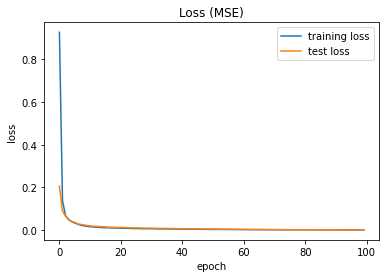

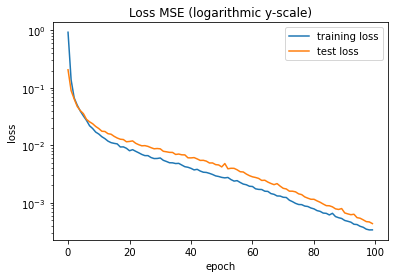

In [3]:
# Compile: opt defined above, loss = mse

model_mse = clone_model(model)
model_mse.compile(loss = 'mean_squared_error', optimizer = opt)

# fit model: validation_data=(testX, testy), epochs=100
history_mse = model_mse.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model, print 
train_mse = model_mse.evaluate(trainX, trainy)
test_mse = model_mse.evaluate(testX, testy)

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training: loss and val_loss
plt.plot(history_mse.history['loss'], label = 'training loss')
plt.plot(history_mse.history['val_loss'], label = 'test loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss (MSE)')
plt.show()

# plot loss during training: loss and val_loss
plt.plot(history_mse.history['loss'], label = 'training loss')
plt.plot(history_mse.history['val_loss'], label = 'test loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log', base = 10)
plt.title('Loss MSE (logarithmic y-scale)')
plt.show()

Mikan esimerkkikuva
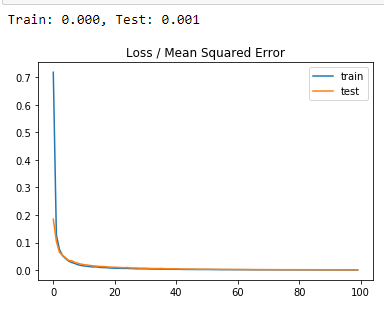

## Mean Absolute Error (MAE)

32/32 [==============================] - 0s 1ms/step - loss: 0.0424
Train: 0.041, Test: 0.042


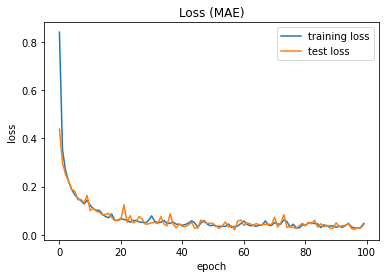

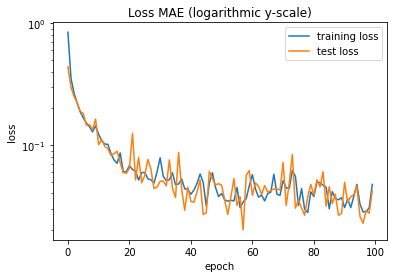

In [4]:
# Compile: opt defined above, loss = mae

model_mae = clone_model(model)
model_mae.compile(loss = 'mean_absolute_error', optimizer = opt)

# fit model: validation_data=(testX, testy), epochs=100
history_mae = model_mae.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model, print 
train_mae = model_mae.evaluate(trainX, trainy)
test_mae = model_mae.evaluate(testX, testy)

print('Train: %.3f, Test: %.3f' % (train_mae, test_mae))

# plot loss during training: loss and val_loss
plt.plot(history_mae.history['loss'], label = 'training loss')
plt.plot(history_mae.history['val_loss'], label = 'test loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss (MAE)')
plt.show()

plt.plot(history_mae.history['loss'], label = 'training loss')
plt.plot(history_mae.history['val_loss'], label = 'test loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log', base = 10)
plt.title('Loss MAE (logarithmic y-scale)')
plt.show()

Mikan esimerkkikuva
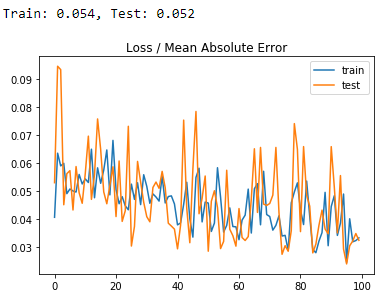

## Huber loss

32/32 [==============================] - 0s 884us/step - loss: 0.0034
Train: 0.002, Test: 0.003


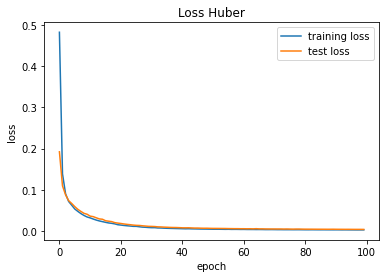

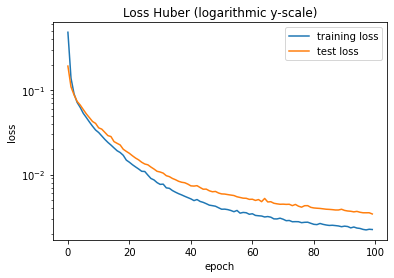

In [5]:
# Compile: opt defined above, loss = tf.keras.losses.Huber()
model_huber = clone_model(model)
model_huber.compile(loss = tf.keras.losses.Huber(), optimizer = opt) # delta = 1.5

# fit model
history_huber = model_huber.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
train_huber = model_huber.evaluate(trainX, trainy)
test_huber = model_huber.evaluate(testX, testy)

print('Train: %.3f, Test: %.3f' % (train_huber, test_huber))

# plot loss during training
plt.plot(history_huber.history['loss'], label = 'training loss')
plt.plot(history_huber.history['val_loss'], label = 'test loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss Huber')
plt.show()

plt.plot(history_huber.history['loss'], label = 'training loss')
plt.plot(history_huber.history['val_loss'], label = 'test loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log', base = 10)
plt.title('Loss Huber (logarithmic y-scale)')
plt.show()

Mikan esimerkkikuva
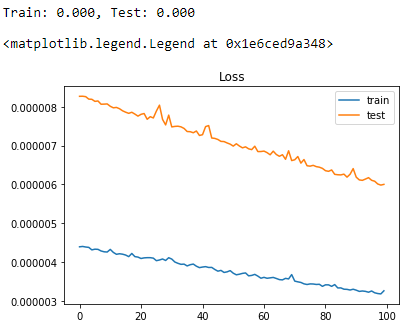

## Conclusion

We compared these within group of students and noticed that it is hard to get the differences visible on the same extent as on the example pictures. If one runs it with more epochs, there is more notable difference. I have used clone_model, so that each model has its own weights.


But the aim of this exercise seems to be to show clear difference between MAE and MSE, and that Huber can be used to balance between them. With Huber's delta, you can control which it should resemble most (I let it be the default).

https://github.com/christianversloot/machine-learning-articles/blob/main/using-huber-loss-in-keras.md